In [22]:
import pandas as pd


In [28]:
bikes = pd.read_csv('./csv/bikes.csv', index_col='datetime', parse_dates=False)
print(bikes.shape)

(10886, 11)


In [32]:
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-09-02 23:00:00,3,0,0,3,27.06,29.545,89,6.0032,53,70,123
2012-08-02 10:00:00,3,0,1,1,32.80,37.880,55,0.0000,51,130,181
2012-10-06 16:00:00,4,0,0,1,24.60,31.060,43,35.0008,317,342,659
2012-05-17 07:00:00,2,0,1,1,22.14,25.760,73,26.0027,25,449,474
2011-08-14 12:00:00,3,0,0,2,28.70,33.335,79,15.0013,98,183,281
2011-10-15 05:00:00,4,0,0,1,17.22,21.210,71,11.0014,1,6,7
2012-10-11 22:00:00,4,0,1,1,16.40,20.455,66,11.0014,10,167,177
2012-03-11 10:00:00,1,0,0,1,13.12,15.150,49,19.0012,71,147,218
2012-11-17 21:00:00,4,0,0,2,13.12,16.665,57,7.0015,15,124,139


In [33]:
bikes.rename(columns={'count': 'total'}, inplace=True)

In [34]:
bikes.sample(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-02-11 23:00:00,1,0,1,1,7.38,12.120,69,0.0000,5,48,53
2012-06-15 08:00:00,2,0,1,1,24.60,29.545,69,11.0014,44,609,653


In [ ]:
feature_cols=['temp']
X=bikes[feature_cols]
y=bikes['total']

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linreg =LinearRegression()

In [44]:
linreg.fit(X,y)

LinearRegression()

In [45]:
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616469
[9.17054048]


In [46]:
temp = 25
linreg.intercept_+linreg.coef_*temp

array([235.309725])

In [47]:
import numpy as np

test_sklearn=np.array(temp).reshape(-1,1)
linreg.predict(test_sklearn)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

In [48]:
feature_cols = ['temp', 'weather','humidity']
bikes[feature_cols].corr()

,temp,weather,humidity
temp,1.000000,-0.055035,-0.064949
weather,-0.055035,1.000000,0.406244
humidity,-0.064949,0.406244,1.000000


In [49]:
import seaborn as sns

<Axes: >

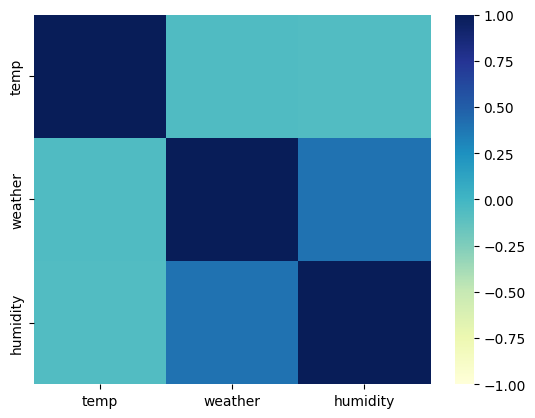

In [50]:
sns.heatmap(bikes[feature_cols].corr(), vmin=-1, vmax=1, center=0, cmap='YlGnBu')

In [51]:
X=bikes[feature_cols]
y=bikes['total']

linreg =LinearRegression()
linreg.fit(X,y)

print(linreg.intercept_)
print(linreg.coef_)

183.23969390859932
[ 8.73698147  3.77938867 -2.80809402]


In [52]:
list(zip(feature_cols,linreg.coef_))

[('temp', np.float64(8.736981468839682)),
 ('weather', np.float64(3.7793886717574163)),
 ('humidity', np.float64(-2.8080940236753573))]

In [53]:
true = [10,7,5,5,10,8,8,15,12]
pred = [12,8,3,4,12,9,8,12,13]

In [54]:
from sklearn import metrics
import numpy as np

In [55]:
print('MAE: ', metrics.mean_absolute_error(true,pred))
print('MSE: ', metrics.mean_squared_error(true,pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(true,pred)))
print('R2: ', metrics.r2_score(true, pred))

MAE:  1.4444444444444444
MSE:  2.7777777777777777
RMSE:  1.6666666666666667
R2:  0.7054973821989529


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
def train_test_error(feature_cols):
    X=bikes[feature_cols]
    y=bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False)
    linreg=LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred=linreg.predict(X_test)

    print(feature_cols)
    print('y_test sample: ', y_test.values[0:10])
    print('y_pred sample: ', y_pred[0:10].astype(int))
    print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2: ', metrics.r2_score(y_test, y_pred))
    print()
    return

In [58]:
train_test_error(['temp', 'humidity'])

['temp', 'humidity']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [394 394 377 394 411 382 351 351 351 334]
MAE:  154.60330484672807
MSE:  44002.98797986699
RMSE:  209.7688918306692
R2:  0.05953123509528524



In [59]:
train_test_error(['temp', 'humidity', 'windspeed'])

['temp', 'humidity', 'windspeed']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [394 394 378 395 412 384 349 349 349 332]
MAE:  154.54203361463792
MSE:  43999.99767857258
RMSE:  209.76176410054475
R2:  0.05959514632254859

